In [1]:
import pandas as pd
from matplotlib import pyplot as plt

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-wwmg249m because the default path (/home/jedrz/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_csv("./data/pso_results.csv")
df.head()

,Seed,Dimensions,NumParticles,MaxIter,InertiaWeight,CognitiveC,SocialC,ParticlePositions,ParticleObjectiveValues,BestObjectiveValue,BestPosition
0,1,2,15,30,0.2,0.2,0.2,"[[0.09687548607729314, -0.5804139616669685], [...","[0.5290070096652894, 0.1646484982317585, 4.210...",1.646485e-01,"[-0.3666282071326047, 0.1738742533168451]"
1,1,2,15,60,0.2,0.2,0.2,"[[-0.013492659877270188, 0.0191638252562765], ...","[0.0006871163996118651, 0.002197122848312273, ...",2.344562e-04,"[0.005086479752666939, 0.014442434335282823]"
2,1,2,15,100,0.2,0.2,0.2,"[[0.008393937892008362, 0.021616575150543216],...","[0.0005395457514478228, 0.0005408117570414609,...",5.307548e-04,"[0.00862825681853445, 0.021361365492719473]"
3,1,2,15,200,0.2,0.2,0.2,"[[1.9025554909557087e-07, -7.227767833440847e-...","[5.586275267027633e-13, 5.585071549048909e-13,...",5.584639e-13,"[1.9027489355898265e-07, -7.226751293768096e-07]"
4,1,2,30,30,0.2,0.2,0.2,"[[-0.6809376629417151, -0.5858437910322354], [...","[1.1332412928004425, 6.6274851017765535, 0.383...",1.087908e-01,"[-0.3176854160486298, 0.08869503485074479]"


In [3]:
df["PartcileX"] = df["ParticlePositions"].apply(lambda val: [val_[0] for val_ in eval(val)])
df["PartcileY"] = df["ParticlePositions"].apply(lambda val: [val_[1] for val_ in eval(val)])
df.head()

,Seed,Dimensions,NumParticles,MaxIter,InertiaWeight,CognitiveC,SocialC,ParticlePositions,ParticleObjectiveValues,BestObjectiveValue,BestPosition,PartcileX,PartcileY
0,1,2,15,30,0.2,0.2,0.2,"[[0.09687548607729314, -0.5804139616669685], [...","[0.5290070096652894, 0.1646484982317585, 4.210...",1.646485e-01,"[-0.3666282071326047, 0.1738742533168451]","[0.09687548607729314, -0.35747492387306645, -1...","[-0.5804139616669685, 0.1407088018243816, -0.5..."
1,1,2,15,60,0.2,0.2,0.2,"[[-0.013492659877270188, 0.0191638252562765], ...","[0.0006871163996118651, 0.002197122848312273, ...",2.344562e-04,"[0.005086479752666939, 0.014442434335282823]","[-0.013492659877270188, -0.03591681020168714, ...","[0.0191638252562765, 0.019493587223754785, 0.0..."
2,1,2,15,100,0.2,0.2,0.2,"[[0.008393937892008362, 0.021616575150543216],...","[0.0005395457514478228, 0.0005408117570414609,...",5.307548e-04,"[0.00862825681853445, 0.021361365492719473]","[0.008393937892008362, 0.008758638604560692, 0...","[0.021616575150543216, 0.021492659289602416, 0..."
3,1,2,15,200,0.2,0.2,0.2,"[[1.9025554909557087e-07, -7.227767833440847e-...","[5.586275267027633e-13, 5.585071549048909e-13,...",5.584639e-13,"[1.9027489355898265e-07, -7.226751293768096e-07]","[1.9025554909557087e-07, 1.9024083920321812e-0...","[-7.227767833440847e-07, -7.227065725669074e-0..."
4,1,2,30,30,0.2,0.2,0.2,"[[-0.6809376629417151, -0.5858437910322354], [...","[1.1332412928004425, 6.6274851017765535, 0.383...",1.087908e-01,"[-0.3176854160486298, 0.08869503485074479]","[-0.6809376629417151, 0.7469975112918017, -0.0...","[-0.5858437910322354, -2.1327631075289197, 0.5..."


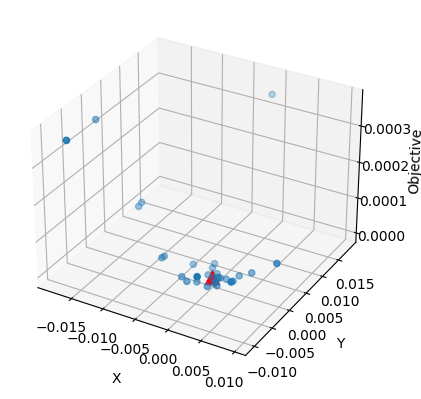

In [4]:
ax = plt.figure().add_subplot(projection="3d")
ax.set_xlabel("\nX")
ax.set_ylabel("\nY")
ax.set_zlabel("Objective")

x = df.PartcileX[500]
y = df.PartcileY[500]
z = [x_**2 + y_**2 for x_, y_ in zip(x, y)]

ax.scatter(x, y, z, label="Particle 0")

best_x = eval(df.BestPosition[500])[0]
best_y = eval(df.BestPosition[500])[1]
best_z = df.BestObjectiveValue[500]

ax.scatter(best_x, best_y, best_z, c="red", marker="^", s=100)

plt.show()